In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import pandas as pd
from skimage import measure
from skimage.transform import rotate
from scipy.signal import savgol_filter
from tvxlamoi import *
import multiprocessing as mp

In [2]:
# ### Parameter
# ghxd = 2300 # gioi han x duoi
# ghxt = 4300 # gioi han x tren
# dd = ghxt - ghxd + 1
# dr = 5 # do rong chia 2
# y = [819, 1031, 1311, 1519, 1799, 2020]
# goc = [183.25, 182.75, 181.25, 181.0, 180.0, 179.0]
# ws = 3

filepath = 'D:\DataE\\20190721\\MO1\\'
phan = 'mo'

In [3]:
## Tao Parameter Multicore
### Parameter
ghxd = 2300*np.ones((6,1)) # gioi han x duoi
ghxt = 4300*np.ones((6,1)) # gioi han x tren
dd = 4300 - 2300 + 1
dr = 5*np.ones((6,1)) # do rong chia 2
y = np.asarray([819, 1031, 1311, 1519, 1799, 2020])
goc = np.asarray([18325, 18275, 18125, 18100, 18000, 17900])
ws = 3*np.ones((6,1))
ptd = 1*np.ones((6,1))
y = y.reshape(6, 1) 
goc = goc.reshape(6, 1)

ghxd = ghxd.astype(int)
ghxt = ghxt.astype(int)
dr = dr.astype(int)
y = y.astype(int)
ws = ws.astype(int)
#ptd = ptd.astype(int)
X = np.concatenate((ghxd, ghxt, dr, y, goc, ws), axis = 1)
print(X)


[[ 2300  4300     5   819 18325     3]
 [ 2300  4300     5  1031 18275     3]
 [ 2300  4300     5  1311 18125     3]
 [ 2300  4300     5  1519 18100     3]
 [ 2300  4300     5  1799 18000     3]
 [ 2300  4300     5  2020 17900     3]]


In [ ]:
kqd = np.zeros((dd, 6)).T
kqb = np.zeros((dd, 6)).T
kq = np.zeros((dd, 6)).T

for number in range(1,6,2):
    ad = np.zeros((dd, 6)).T
    ab = np.zeros((dd, 6)).T
    a = np.zeros((dd, 6)).T
    
    measurement = filepath + 'mau'  + str(number + 1) + '.jpg'
    base = filepath + 'mau'  + str(number) + '.jpg'
    print(base)
    cotbase = np.asarray([base, base, base, base, base, base])
    cotmea = np.asarray([measurement, measurement, measurement, measurement, measurement, measurement])
    Y = np.column_stack((cotmea, X.astype(np.object)))
    Y = np.column_stack((cotbase, Y.astype(np.object)))
    num_workers = mp.cpu_count()
    p = mp.Pool(1)
    print(Y, num_workers)
    ab, ad, a = p.starmap(xuliabs, Y)
    p.close()
    p.join()
    print('Hoan thanh ' + str(int((number)/6*100)) + ' %' )
    
    print('\n')
    kqd = kqd + ad
    kqb = kqb + ab
    kq = kq + a

kqd = kqd/3.0
kqb = kqb/3.0
kq = kq/3.0

D:\DataE\20190721\MO1\mau1.jpg
[['D:\\DataE\\20190721\\MO1\\mau1.jpg'
  'D:\\DataE\\20190721\\MO1\\mau2.jpg' 2300 4300 5 819 18325 3]
 ['D:\\DataE\\20190721\\MO1\\mau1.jpg'
  'D:\\DataE\\20190721\\MO1\\mau2.jpg' 2300 4300 5 1031 18275 3]
 ['D:\\DataE\\20190721\\MO1\\mau1.jpg'
  'D:\\DataE\\20190721\\MO1\\mau2.jpg' 2300 4300 5 1311 18125 3]
 ['D:\\DataE\\20190721\\MO1\\mau1.jpg'
  'D:\\DataE\\20190721\\MO1\\mau2.jpg' 2300 4300 5 1519 18100 3]
 ['D:\\DataE\\20190721\\MO1\\mau1.jpg'
  'D:\\DataE\\20190721\\MO1\\mau2.jpg' 2300 4300 5 1799 18000 3]
 ['D:\\DataE\\20190721\\MO1\\mau1.jpg'
  'D:\\DataE\\20190721\\MO1\\mau2.jpg' 2300 4300 5 2020 17900 3]] 4


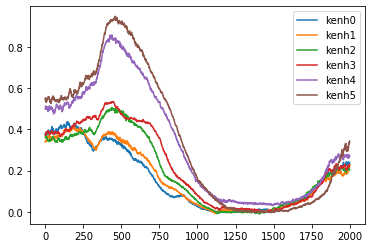

In [19]:
for i in range(0,6,1):
    plt.plot(kq[i], label='kenh' + str(i))
plt.legend(loc='upper right')
plt.show()

In [16]:
solieu = np.column_stack((kq[0], kq[1], kq[2], kq[3], kq[4], kq[5]))
filename = phan + '.csv'
df = pd.DataFrame(solieu)
df.to_csv(filepath + filename, index = False)

In [164]:
solieu = np.column_stack((kqd[0], kqd[1], kqd[2], kqd[3], kqd[4], kqd[5]))
df = pd.DataFrame(solieu)
df.to_csv(filepath + 'do.csv', index = False)

solieu = np.column_stack((kqb[0], kqb[1], kqb[2], kqb[3], kqb[4], kqb[5]))
df = pd.DataFrame(solieu)
df.to_csv(filepath + 'ba.csv', index = False)

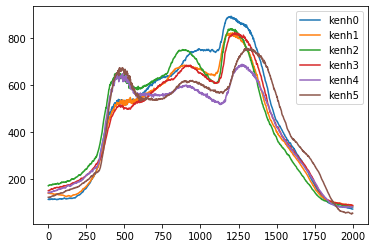

In [21]:
for i in range(0,6,1):
    plt.plot(kqb[i], label='kenh' + str(i))
plt.legend(loc='upper right')
plt.show()